## Quick Quiz Prep (Definitely not official by any means)

Berikut adalah gambaran kasar soal apa yang mungkin keluar di quiz. Perhatikan bahwa semua yang ditulis di sini belum tentu akan semuanya keluar di quiz. Di sini hanya untuk memberikan gambaran kasar apa saja yang harus dipersiapkan nanti...

Jika ada pertanyaan, langsung tanya saja ya. Good luck
༼ つ ◕_◕ ༽つ

In [2]:
# Import library di sini (kalian harus define library sendiri saat quiz nanti)
import numpy as np
import matplotlib.pyplot as plt

### No 1. Linear Equation

Diketahui sistem persamaan linear berikut:

$\begin{cases}
10a + b + c = 12 \\
2a - 10b + c = 13 \\
2a + 2b + 5c = 14
\end{cases}$

Gunakan metode **Gauss-Seidel** untuk menentukan nilai dari \(a\), \(b\), dan \(c\) dengan toleransi \(ε = 0.001\), dengan tebakan awal a = 0, b = 0, c = 0, dan iterasi maksimal sebanyak 30 kali 


In [3]:
# Lec 2 
## Template...
Xs = [
  [10, 1, 1],
  [2, -10, 1],
  [2, 2, 5]
]
Ys = [12, 13, 14]

## Mulai dari sini...
def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis=1) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol=0.001, max_iteration=30):
    if not diagonal_dominant(x):
        print("Not Diagonal Dominant")
        return
    
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x[0]))

    for i in range(max_iteration):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx]+np.dot(row, new_res)) / diag[idx] # rumus gaus seidel

        print(f"iterartion {i+1} : {new_res}")

        distance = np.sqrt(np.dot(old_res - new_res, old_res - new_res)) # rumus distance 
                           
        if distance < tol:
          print("Converge")
          return new_res
        
        old_res = new_res
gauss_seidel(Xs, Ys)



iterartion 1 : [ 1.2   -1.06   2.744]
iterartion 2 : [ 1.0316   -0.81928   2.715072]
iterartion 3 : [ 1.0104208  -0.82640864  2.72639514]
iterartion 4 : [ 1.01000135 -0.82536022  2.72614355]
iterartion 5 : [ 1.00992167 -0.82540131  2.72619186]
Converge


array([ 1.00992167, -0.82540131,  2.72619186])

### No 2. Linear Regression

Buatlah persaman garis trend terhadap x dengan y menggunakan linear regression

Gunakan rumus berikut sebagai panduan (rumus tidak akan diberikan saat quiz)

$\boldsymbol{\beta} = (A^\top A)^{-1} A^\top {Y}$


alpha: [[2.43773374]
 [4.5530113 ]]


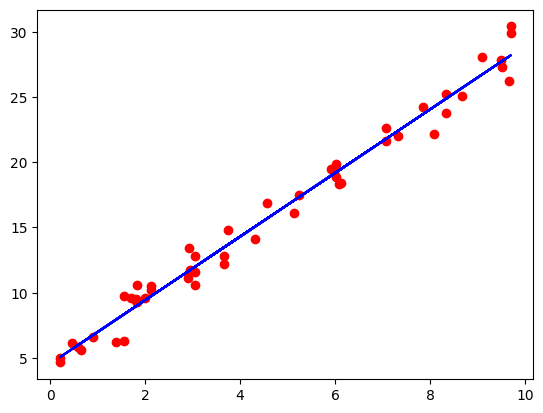

In [5]:
# Lec 3 (Least Square Regression)

## Template...
x = [3.7454, 9.5071, 7.3199, 5.9866, 1.5602, 1.5599, 0.5808, 8.6618, 6.0112, 7.0807,
  0.2058, 9.6991, 8.3244, 2.1234, 1.8182, 1.8340, 3.0424, 5.2476, 4.3195, 2.9123,
  6.1185, 1.3949, 2.9214, 3.6636, 4.5607, 7.8518, 1.9967, 5.1423, 5.9241, 0.4645,
  6.0754, 1.7052, 0.6505, 9.4889, 9.6563, 8.0839, 3.0461, 2.9398, 9.0851, 0.8926,
  3.6618, 6.0112, 7.0807, 0.2058, 9.6991, 8.3244, 2.1234, 1.8182, 1.8340, 3.0424]
y = [14.7732, 27.3086, 21.9848, 19.1797, 6.3277, 9.7238, 5.8392, 25.0594, 19.8312, 22.6396,
  5.0127, 30.4071, 23.7478, 10.2182, 9.5024, 9.3109, 10.5543, 17.5202, 14.1518, 11.1426,
  18.3864, 6.2259, 13.4306, 12.2331, 16.8864, 24.2649, 9.5713, 16.1173, 19.4648, 6.1537,
  18.3104, 9.5916, 5.6269, 27.8698, 26.2203, 22.1328, 12.8021, 11.7026, 28.0513, 6.5832,
  12.8237, 18.8369, 21.6254, 4.6521, 29.8769, 25.2628, 10.5312, 9.3773, 10.5647, 11.6133]

## Mulai dari sini...
x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]
alpha = np.linalg.inv(np.dot(A.T, A))
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha, Y)

print(f"alpha: {alpha}")

plt.plot(x, y, "ro")
plt.plot(x, alpha[0] * x + alpha[1], "b-")
plt.show()

### No 3. Root of Equation

Gunakan metode **Newton Raphson** untuk menentukan root of equation dari persamaan dengan toleransi \(ε = 0.001\), dan maksimal iterasi = 30

$f(x) = -2x^3 - 6x^2 + 12x - 7$

Untuk nilai prediksi awal ditentukan sendiri (bebas)

In [19]:
# lec 4 (Newton Raphson)
## Template
def f(x):
  return -2 * (x ** 3) - 6 * (x ** 2) + 12 * x + 7

## Mulai dari sini...
def g(x):
  return -6 * (x**2) - 12 * x + 12

def newton_raphson(x0, tol=0.001):
  x1 = x0 - f(x0) / g(x0)
  fx1 = f(x1)

  if(np.abs(fx1 ) < tol):
    print(f"Found root at {x1}")
    print(f(x1))
    return
  else:
    newton_raphson(x1, tol)
  
newton_raphson(123)

Found root at 1.709045337262638
-0.0001539149297506981


### No 4. Riemann Integral

Gunakan metode **Left Riemann Sum** Untuk menentukan estimasi luas area dengan persamaan

$f(x) = 3x^2 - 4$

Pada interval $x = 3$ hingga $x = 5$, dengan interval $n = 20$

In [3]:
## Template
def f(x):
  return 3 * (x ** 2) - 4

## Mulai dari sini...
a = 3
b = 5
n = 20

width = (b-a) / (n-1)
x = np.linspace(a, b, n)
y = f(x)

left_rieman = width * np.sum((f(x[:-1])))
print(left_rieman)

87.48476454293628
